In [1]:
import matplotlib.pyplot as plt
import numpy as np
import tensorflow as tf

## 1 Feedforward: Building a ReLU neural network
Consider the rectified linear activation function : hj = max(0, aj ).

1. Draw a network with:
• 2 inputs
• 1 hidden layers with 4 hidden units and a
• 1-class output (for binary classification)


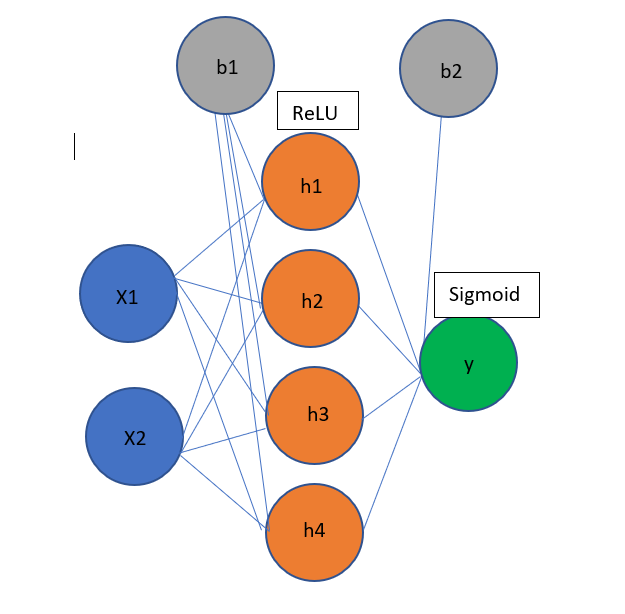

2. Write out the mathematical equation for the output of this network (feel
free to break the input-output relationship into multiple equations).

$$
f = max(0,x)
$$

$$
g = \frac{1}{1+e^-x}
$$

$$
h  = f(xW+b1)
$$

$$
y = g(vh+b2)
$$

3. Write out the forward-pass function in python, call it ff nn ReLu(...)

In [2]:
def nn_ReLu(X, W, b, V, c):
    layer1 = tf.nn.relu(np.dot(X,W)+b)
    return tf.nn.sigmoid(np.dot(layer1,V)+c)

4. What are the class probabilities associated with the forward pass of each
sample?

In [3]:
w = np.array([[1,-1,0,1],[0,0,0.5,1]])
b = np.array([0,0,1,0])
v = np.array([1,0,-1,1])
c = np.array([1])
x = np.array([[1,-1],[0,-1],[0,1]])

In [4]:
nn_ReLu(x, w, b, v, c)

<tf.Tensor: shape=(3,), dtype=float64, numpy=array([0.81757448, 0.62245933, 0.62245933])>

## 2 Gradient Descent
Consider a simple non-convex function of two variables:
f(x, y) = (3 − x
3
) + 50 ∗ (2y
2 − x)
2



1. What are the partial derivatives of f with respect to x and to y?

$\frac{\partial f}{\partial x} = -3x^2+100x-200y$

$\frac{\partial f}{\partial y} = 800y^3-400xy$

2. Create a visualization of the contours of this function.

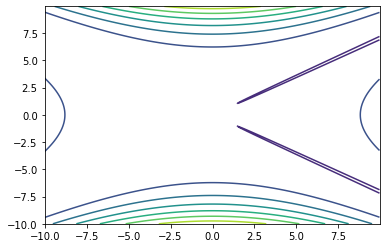

In [5]:
x = np.arange(-10,10,.05)
y = np.arange(-10,10,.05)
X, Y = np.meshgrid(x,y)
Z = (3-X**3)+50*(2*Y**2 - X**2)**2
fig, ax = plt.subplots()
CS = ax.contour(X,Y,Z)

3. Write a Gradient Descent algorithm for finding the minimum of the function. Visualize your results with a few different learning rates.

In [6]:
def grad_f(vector):
    x, y = vector    
    df_dx = -3*(x**2)+100*x-200*(y**2)
    df_dy = 800*y**3-400*x*y
    return np.array([df_dx, df_dy])

def grad_descent(starting_point=None, iterations=10, learning_rate=12):
    if starting_point is None:
      point = np.random.uniform(-10, 10, size=2)
    else:
      point = starting_point
    trajectory = [point]

    for i in range(iterations):
      grad = grad_f(point)
      point = point - learning_rate * grad
      trajectory.append(point)
    return np.array(trajectory)

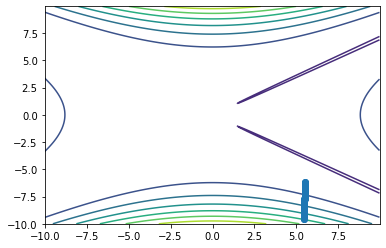

In [7]:
np.random.seed(10)
traj = grad_descent(iterations=100, learning_rate=1e-7)

fig, ax = plt.subplots()
CS = ax.contour(X, Y, Z)
x= traj[:,0]
y= traj[:,1]
plt.plot(x,y,'-o')

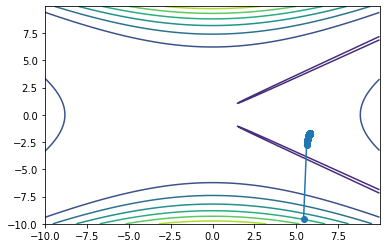

In [8]:
np.random.seed(10)
traj = grad_descent(iterations=100, learning_rate=1e-5)

fig, ax = plt.subplots()
CS = ax.contour(X, Y, Z)
x= traj[:,0]
y= traj[:,1]
plt.plot(x,y,'-o')

4. Write a Gradient Descent With Momentum algorithm for finding the minimum. Visualize your results with a few different settings of the algorithm’s
hyperparameters.

In [9]:
def grad_descent_with_momentum(starting_point=None, iterations=10, alpha=.9, epsilon=10):
  # epsilon is learnign rate
  # alpha is forgetting rate for velocity

    if starting_point is None:
      point = np.random.uniform(-10, 10, size=2)
    else:
      point = starting_point
    trajectory = [point]
    v = np.zeros(point.size)

    for i in range(iterations):
      grad = grad_f(point)
      v = alpha * v + epsilon * grad
      point = point - v
      trajectory.append(point)
    return np.array(trajectory)

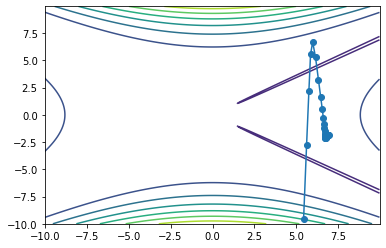

In [10]:
np.random.seed(10)
traj = grad_descent_with_momentum(iterations=50, alpha=.7, epsilon=1e-5)

fig, ax = plt.subplots()
CS = ax.contour(X, Y, Z)
x= traj[:,0]
y= traj[:,1]
plt.plot(x,y,'-o')

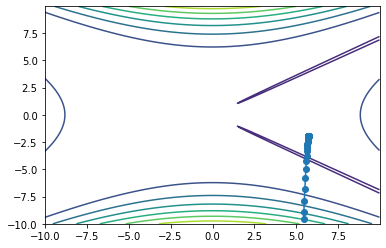

In [11]:
np.random.seed(10)
traj = grad_descent_with_momentum(iterations=50, alpha=.7, epsilon=1e-6)

fig, ax = plt.subplots()
CS = ax.contour(X, Y, Z)
x= traj[:,0]
y= traj[:,1]
plt.plot(x,y,'-o')

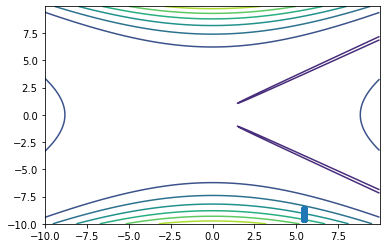

In [12]:
np.random.seed(10)
traj = grad_descent_with_momentum(iterations=50, alpha=.7, epsilon=1e-8)

fig, ax = plt.subplots()
CS = ax.contour(X, Y, Z)
x= traj[:,0]
y= traj[:,1]
plt.plot(x,y,'-o')

## 3 Backprop

1. For the same network as in Question 1, derive expressions of the gradient
of the Loss function with respect to each of the model parameters.


$\frac{d L}{d \hat{y}} = -(\frac{yi}{\hat{yi}}-\frac{1-yi}{1-\hat{yi}})$

$\frac{\partial L}{\partial W} = \frac{d L}{d \hat{y}}out$

$\frac{\partial L}{\partial b} = \frac{d L}{d \hat{y}}\frac{\partial \hat{y}}{\partial out}\frac{d out}{d in}\frac{\partial in}{\partial b}$

$\frac{\partial L}{\partial W} = \frac{d L}{d \hat{y}}\frac{\partial \hat{y}}{\partial out}\frac{d out}{d in}\frac{\partial in}{\partial W}$

2. Write a function grad f(...) that takes in a weights vector and returns
the gradient of the Loss at that location.

In [13]:
def loss(y, y_hat):
    # binary cross entropy
    return  np.sum(- (y*np.log(y_hat) + (1-y)*np.log(1 - y_hat)))

def sigmoid(x):
    return 1/(1+np.exp(-x))

def sigmoid_derivative(x):
    return sigmoid(x) * (1 - sigmoid(x))

def relu(x):
    return np.maximum(x,0)

def relu_derivative(x):
    return np.where(x>0, 1, 0)

def yhat(x, W, b, v, c):
    # returns model prediction 
    h = relu(np.dot(x,W) + b) # Vecor holding both h's
    y = sigmoid(np.dot(h,v) + c) # Output of the network
    return y

def binary_xent_residual(y, y_hat):
    return (y/y_hat - (1-y)/(1-y_hat))

def pack_params(param_vec):
    w_11, w_12, w_13, w_14, w_21, w_22, w_23, w_24, b_1, b_2, b_3, b_4, v_1, v_2, v_3, v_4, c = param_vec
    W = np.array([[w_11,w_12, w_13, w_14],[w_21,w_22, w_23, w_24]])
    b = np.array([b_1, b_2, b_3, b_4])
    v = np.array([v_1,v_2, v_3, v_4])
    c = np.array([c])
    return((W, b, v, c))

def grad_f(param_vec, x, y):
    W, b, v, c = pack_params(param_vec)
    
    a = np.dot(x,W)+b
    h = relu(a)
    y_a = np.dot(h,v)+c
    y_hat = sigmoid(y_a)

    dL_dc = binary_xent_residual(y, y_hat).dot( y_hat*(1-y_hat))
    dL_dv = (binary_xent_residual(y, y_hat) * y_hat*(1-y_hat)).T.dot(h)
    dL_db = (binary_xent_residual(y, y_hat) * y_hat*(1-y_hat)).T.dot(relu_derivative(a))*v
    dL_dw = x.T.dot(np.expand_dims((binary_xent_residual(y, y_hat) * y_hat*(1-y_hat)),1).dot(np.expand_dims(v,1).T))
    
    return np.array([dL_dw[0,0], dL_dw[0,1], dL_dw[0,2], dL_dw[0,3],
                   dL_dw[1,0], dL_dw[1,1], dL_dw[1,2], dL_dw[1,3],
                   dL_db[0], dL_db[1], dL_db[2], dL_db[3],
                   dL_dv[0], dL_dv[1], dL_dv[2], dL_dv[3],
                   dL_dc]) / len(y)

3. Generate a synthetic dataset like the XOR pattern (see below).

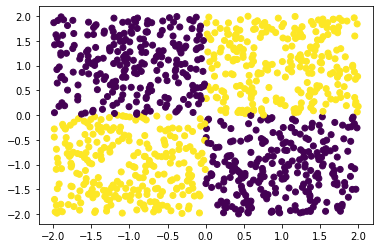

In [14]:
x = np.random.uniform(low=-2,high=2,size=2000).reshape((1000,2))
y=np.zeros(1000)
y[np.logical_and(x[:,0]>0 , x[:,1]>0)]=1
y[np.logical_and(x[:,0]<0 , x[:,1]<0)]=1
plt.scatter(x[:,0],x[:,1],c=y)

4. Fit your network using Gradient Descent. Keep track of the total Loss at
each iteration and plot the result.


In [15]:
def grad_descent(x, y,  iterations=10, learning_rate=1e-2):
    point = np.array([w[0][0],w[0][1], w[0][2], w[0][3],
                      w[1][0], w[1][1],w[1][2], w[1][3],
                      b[0], b[1], b[2], b[3],
                      v[0], v[1], v[2], v[3],
                      c[0]])
    trajectory = [point]
    losses = [loss(y, yhat(x, *pack_params(point)))]
    
    for i in range(iterations):
        grad = grad_f(point, x, y)
        point = point + learning_rate * grad
        trajectory.append(point)
        losses.append(loss(y, yhat(x, *pack_params(point))))
    return (np.array(trajectory), losses)

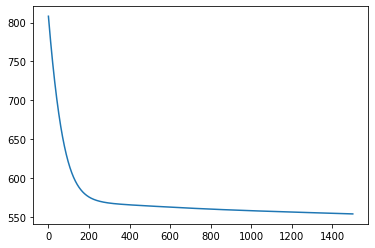

In [16]:
traj, losses = grad_descent(x, y, iterations=1500,learning_rate=1e-2)
plt.plot(losses)

5. Repeat the exercise above using Momentum. Comment on whether your
algorithm seems to converge more efficiently.

In [20]:
def grad_descent_with_momentum(x, y, starting_point=None, iterations=10, alpha=.9, epsilon=10):
    # epsilon is learnign rate
    # alpha is forgetting rate for velocity
    if starting_point is None:
      point = np.random.uniform(-1, 1, size=17)
    else:
      point = starting_point
    trajectory = [point]
    v = np.zeros(point.size)
    losses = []

    for i in range(iterations):
        grad = grad_f(point, x, y)
        point =  point + alpha * v + epsilon * grad
        trajectory.append(point)
        losses.append(loss(y, yhat(x, *pack_params(point))))
    return (np.array(trajectory), losses)

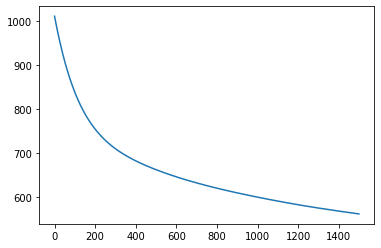

In [28]:
traj, losses = grad_descent_with_momentum(x, y, iterations=1500, alpha=0.7, epsilon=1e-2)
plt.plot(losses)

It takes more time for the algorithum to converge. I am not sure why this is true. Technically it should help us converge faster becasue it has memory of previous iterations.

6. Plot a visualization of the final decision boundary that your model has
learned. Overlay the datapoints in this plot.

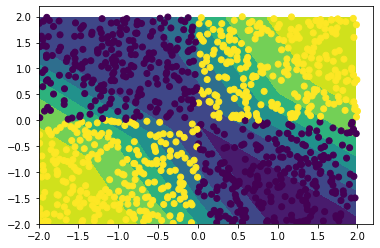

In [22]:
delta = 0.025
x1 = np.arange(-2.0, 2.0, delta)
x2 = np.arange(-2.0, 2.0, delta)
X1, X2 = np.meshgrid(x1, x2)
YHAT = yhat(np.array((X1.ravel(),X2.ravel())).T, *pack_params(traj[-1])).reshape((160,160))
fig, ax = plt.subplots()
CS = ax.contourf(X1, X2, YHAT)

plt.scatter(x[:,0],x[:,1],c=y)